### This cell is used to examine process data and quality data related to the production of penicillin.. 
###  Trying to glean as much information as you can about the behavior of quality data. 


In [1]:
# import necessary libraries
# Additional functions for analysing and manipulating data
import pandas as pd
import os
import glob
import seaborn

# Mathematical functions 
import math 
# Fundamental package for scientific computing with Python
import numpy as np

#  Important package for visualization - we use this to plot data
import matplotlib.pyplot as plt
import re
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
# Packages for measuring model performance / errors
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Tools for predictive data analysis.
from sklearn import linear_model
from sklearn import svm
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
# SGDRegressor(max_iter=1000, tol=1e-3)
from sklearn import tree
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


In [2]:
# Folder path name 
path = r'C:\Users\User\gitHub\DS challenge\DS_challenge'

# use glob to get all the Excel files in the directory
excel_files = glob.glob(os.path.join(path, "*.xlsx"))

# sort files based on modificatin date( ascending from Jan- Dec)
list_of_files = sorted( excel_files,
                        key = os.path.getmtime)
# print(list_of_files[0])

#read all the excel sheets and store it as dataframe 
Tables= list()

for f in list_of_files:
    df = pd.read_excel(f)
    Tables.append(df)


In [3]:
Process_data=Tables[0]
Quality_data=Tables[1]
Spectra_data=Tables[2]

In [4]:
np.shape(Process_data)

(1000, 32)

In [5]:
# Quality_data.head(50)

In [6]:
Process_data.head(20)

BatchID  Time (h)  Aeration rate(Fg:L/h)  Agitator RPM(RPM:RPM)  \
0         1        10                     42                    100   
1         1        20                     42                    100   
2         1        30                     55                    100   
3         1        40                     55                    100   
4         1        50                     60                    100   
5         1        70                     60                    100   
6         1        80                     60                    100   
7         1        90                     60                    100   
8         1       120                     75                    100   
9         1       150                     75                    100   
10        2        10                     42                    100   
11        2        20                     42                    100   
12        2        30                     55                    100   
13        2        40                     55                    100   
14        2        50                     60                    100   
15        2        70                     60                    100   
16        2        80                     60                    100   
17        2        90                     60                    100   
18        2       120                     75                    100   
19        2       150                     75                    100   

    Sugar feed rate(Fs:L/h)  Acid flow rate(Fa:L/h)  Base flow rate(Fb:L/h)  \
0                        15                     0.0                  49.499   
1                        75                     0.0                  53.583   
2                        37                     0.0                  47.493   
3                        47                     0.0                  35.571   
4                        61                     0.0                  42.775   
5                        84                     0.0                  56.614   
6                       116                     0.0                  79.227   
7                        90                     0.0                  51.361   
8                        90                     0.0                  52.157   
9                        90                     0.0                  75.416   
10                       15                     0.0                  50.778   
11                       75                     0.0                 134.570   
12                       37                     0.0                 144.630   
13                       47                     0.0                  79.843   
14                       61                     0.0                  78.175   
15                       84                     0.0                  89.056   
16                      116                     0.0                  84.337   
17                       90                     0.0                  67.961   
18                       90                     0.0                  66.778   
19                       90                     0.0                  61.191   

    Heating/cooling water flow rate(Fc:L/h)  Heating water flow rate(Fh:L/h)  \
0                                  151.1600                           0.0001   
1                                  137.4900                           0.0001   
2                                  110.6300                           0.0001   
3                                  150.7400                           0.0001   
4                                  125.1200                           0.0001   
5                                    1.5594                           0.0001   
6                                  141.8100                           0.0001   
7                                   51.2700                           0.0001   
8                                   49.5070                           0.0001   
9                                    0.0001         

In [7]:
# remove the Batch ID cause the data going to be unfolded as batche per row (ie batch one is row one )
Data_without_BatchID=Process_data.drop(columns=['BatchID'])


In [8]:
# Data_F_keys

In [9]:
Data_without_BatchID[0:10]

Time (h)  Aeration rate(Fg:L/h)  Agitator RPM(RPM:RPM)  \
0        10                     42                    100   
1        20                     42                    100   
2        30                     55                    100   
3        40                     55                    100   
4        50                     60                    100   
5        70                     60                    100   
6        80                     60                    100   
7        90                     60                    100   
8       120                     75                    100   
9       150                     75                    100   

   Sugar feed rate(Fs:L/h)  Acid flow rate(Fa:L/h)  Base flow rate(Fb:L/h)  \
0                       15                     0.0                  49.499   
1                       75                     0.0                  53.583   
2                       37                     0.0                  47.493   
3                       47                     0.0                  35.571   
4                       61                     0.0                  42.775   
5                       84                     0.0                  56.614   
6                      116                     0.0                  79.227   
7                       90                     0.0                  51.361   
8                       90                     0.0                  52.157   
9                       90                     0.0                  75.416   

   Heating/cooling water flow rate(Fc:L/h)  Heating water flow rate(Fh:L/h)  \
0                                 151.1600                           0.0001   
1                                 137.4900                           0.0001   
2                                 110.6300                           0.0001   
3                                 150.7400                           0.0001   
4                                 125.1200                           0.0001   
5                                   1.5594                           0.0001   
6                                 141.8100                           0.0001   
7                                  51.2700                           0.0001   
8                                  49.5070                           0.0001   
9                                   0.0001                          10.5860   

   Water for injection/dilution(Fw:L/h)  Air head pressure(pressure:bar)  ...  \
0                                     0                              0.6  ...   
1                                     0                              0.7  ...   
2                                     0                              0.8  ...   
3                                     0                              0.9  ...   
4                                     0                              1.1  ...   
5                                   500                              1.1  ...   
6                                   100                              1.1  ...   
7                                   100                              1.1  ...   
8                                   100                              1.0  ...   
9                                   100                              1.0  ...   

   PAA concentration offline(PAA_offline:PAA (g L^{-1}))  Oil flow(Foil:L/hr)  \
0                                                NaN                       30   
1                                                NaN                       35   
2                                                NaN                       35   
3                                                NaN                       35   
4                                                NaN                       35   
5                                                NaN                       31   
6                                                NaN                       29   
7                                                NaN          

In order to get insight into which variables correlate the best with final quality variables, the
process data and the quality dataset need to have similar structure. However, the process
data for each batch consist of 30 process variables (30 columns) measured over 10 time points
(10 rows). On the other hand, the quality data for each batch consist of 1 row. Thus, the first
step is to convert the process data of each batch into 1 row vector (unfolding). This can be
done by transposing each column vector in the process data of each batch into row vector.
This vector now contains the time-resolved variables of the original variable i.e., the pH original
variable become many variables that measure the pH over time points (pH at 10 min, pH at
20 min ..etc). After that all of these row vectors are stacked after each other as show in Figure

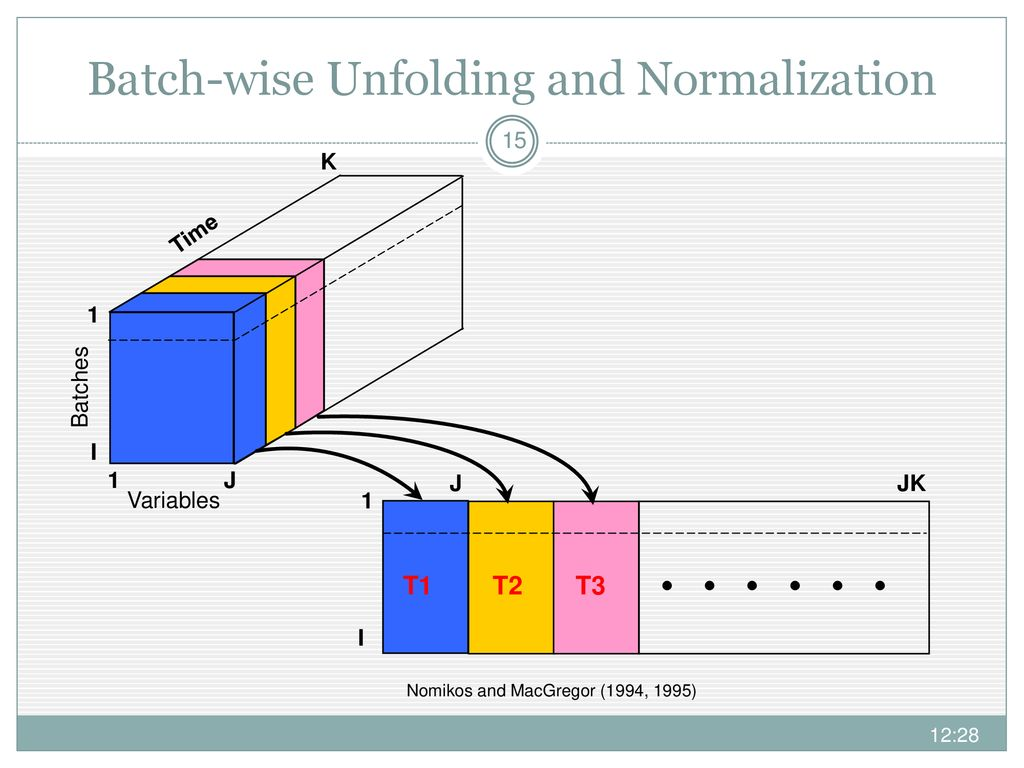

#https://slideplayer.com/slide/15997299/


In [10]:
###################################################################################################
# We have in the Process data 100 Patch, so we need to have 100 row, each row represent one patch #
###################################################################################################

# unfolding Process data/ make each patch to be each row 
stacked_data=list()
for i in range(0,100):
    Flattend_array=np.ravel(Data_without_BatchID[i*10:i*10+10],order='F')
    stacked_data.append(Flattend_array)
   

In [11]:
np.shape(stacked_data)

(100, 310)

In [12]:
# Adding times to the column names/ example (Time (h) at time 10, at time 20 and so on)
New_PrKeys=list()
Times=[10,20,30,40,50,70,80,90,120,150]
for i in Data_without_BatchID:
    for time in Times:
        New_PrKeys.append(i+' at time {}'.format(time))

In [13]:
np.shape(New_PrKeys)

(310,)

In [14]:
# New_PrKeys

In [15]:
##########################################################################################
# We have the unfolded array, we need to add the columns names of the array based on time#
##########################################################################################

df=pd.DataFrame(stacked_data,columns=New_PrKeys)
df.head()

Time (h) at time 10  Time (h) at time 20  Time (h) at time 30  \
0                 10.0                 20.0                 30.0   
1                 10.0                 20.0                 30.0   
2                 10.0                 20.0                 30.0   
3                 10.0                 20.0                 30.0   
4                 10.0                 20.0                 30.0   

   Time (h) at time 40  Time (h) at time 50  Time (h) at time 70  \
0                 40.0                 50.0                 70.0   
1                 40.0                 50.0                 70.0   
2                 40.0                 50.0                 70.0   
3                 40.0                 50.0                 70.0   
4                 40.0                 50.0                 70.0   

   Time (h) at time 80  Time (h) at time 90  Time (h) at time 120  \
0                 80.0                 90.0                 120.0   
1                 80.0                 90.0                 120.0   
2                 80.0                 90.0                 120.0   
3                 80.0                 90.0                 120.0   
4                 80.0                 90.0                 120.0   

   Time (h) at time 150  ...  \
0                 150.0  ...   
1                 150.0  ...   
2                 150.0  ...   
3                 150.0  ...   
4                 150.0  ...   

   Viscosity(Viscosity_offline:centPoise) at time 10  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

   Viscosity(Viscosity_offline:centPoise) at time 20  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

   Viscosity(Viscosity_offline:centPoise) at time 30  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

   Viscosity(Viscosity_offline:centPoise) at time 40  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

   Viscosity(Viscosity_offline:centPoise) at time 50  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

   Viscosity(Viscosity_offline:centPoise) at time 70  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

   Viscosity(Viscosity_offline:centPoise) at time 80  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

   Viscosity(Viscosity_offline:centPoise) at time 90  \
0                                                NaN   
1                                                NaN   
2                                                N

In [16]:
#Clean all the NAN columns 
Cleaned_data= df.dropna(axis='columns')

In [17]:
Cleaned_data.keys()

Index(['Time (h) at time 10', 'Time (h) at time 20', 'Time (h) at time 30',
       'Time (h) at time 40', 'Time (h) at time 50', 'Time (h) at time 70',
       'Time (h) at time 80', 'Time (h) at time 90', 'Time (h) at time 120',
       'Time (h) at time 150',
       ...
       'Ammonia shots(NH3_shots:kgs) at time 20',
       'Ammonia shots(NH3_shots:kgs) at time 30',
       'Ammonia shots(NH3_shots:kgs) at time 40',
       'Ammonia shots(NH3_shots:kgs) at time 50',
       'Ammonia shots(NH3_shots:kgs) at time 70',
       'Ammonia shots(NH3_shots:kgs) at time 80',
       'Ammonia shots(NH3_shots:kgs) at time 90',
       'Ammonia shots(NH3_shots:kgs) at time 120',
       'Ammonia shots(NH3_shots:kgs) at time 150',
       'Viscosity(Viscosity_offline:centPoise) at time 120'],
      dtype='object', length=265)

In [18]:
# delete the columns that contain Time (h)
Cleaned_data=Cleaned_data.drop(columns=['Time (h) at time 10','Time (h) at time 20','Time (h) at time 30','Time (h) at time 40',
                                       'Time (h) at time 50','Time (h) at time 70','Time (h) at time 80',
                                       'Time (h) at time 90','Time (h) at time 120','Time (h) at time 150'])


In [19]:
# Now we have the cleaned data as patch per row at different times 
Cleaned_data.head()

Aeration rate(Fg:L/h) at time 10  Aeration rate(Fg:L/h) at time 20  \
0                              42.0                              42.0   
1                              42.0                              42.0   
2                              42.0                              42.0   
3                              42.0                              42.0   
4                              42.0                              42.0   

   Aeration rate(Fg:L/h) at time 30  Aeration rate(Fg:L/h) at time 40  \
0                              55.0                              55.0   
1                              55.0                              55.0   
2                              55.0                              55.0   
3                              55.0                              55.0   
4                              55.0                              55.0   

   Aeration rate(Fg:L/h) at time 50  Aeration rate(Fg:L/h) at time 70  \
0                              60.0                              60.0   
1                              60.0                              60.0   
2                              60.0                              60.0   
3                              60.0                              60.0   
4                              60.0                              60.0   

   Aeration rate(Fg:L/h) at time 80  Aeration rate(Fg:L/h) at time 90  \
0                              60.0                              60.0   
1                              60.0                              60.0   
2                              60.0                              60.0   
3                              60.0                              60.0   
4                              60.0                              60.0   

   Aeration rate(Fg:L/h) at time 120  Aeration rate(Fg:L/h) at time 150  ...  \
0                               75.0                               75.0  ...   
1                               75.0                               75.0  ...   
2                               75.0                               75.0  ...   
3                               75.0                               75.0  ...   
4                               75.0                               75.0  ...   

   Ammonia shots(NH3_shots:kgs) at time 20  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   Ammonia shots(NH3_shots:kgs) at time 30  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   Ammonia shots(NH3_shots:kgs) at time 40  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   Ammonia shots(NH3_shots:kgs) at time 50  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   Ammonia shots(NH3_shots:kgs) at time 70  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   Ammonia shots(NH3_shots:kgs) at time 80  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   Ammonia shots(NH3_shots:kgs) at time 90  \
0                                      0.0   
1           

In [21]:
# write the table into excel/ after unfolding the data into patches and rmoving the NAN rows
Cleaned_data.to_excel("Cleaned_data_array.xlsx",float_format=None)

In [23]:
QD= Quality_data.drop(columns=['BatchID'])
# np.shape(QD)

In [24]:
# We have a folder contains 100 patches per 3 quality attribute
np.shape(QD)

(100, 3)

In [25]:
QD.head()

Penicllin_harvested_during_batch(kg)  \
0                               1070000   
1                                986000   
2                               1420000   
3                                816000   
4                               1130000   

   Penicllin_harvested_end_of_batch (kg)  Penicllin_yield_total (kg)  
0                                1720000                     2790000  
1                                1340000                     2330000  
2                                1260000                     2680000  
3                                1070000                     1890000  
4                                2430000                     3560000

In [28]:
QD.keys()

Index(['Penicllin_harvested_during_batch(kg)',
       'Penicllin_harvested_end_of_batch (kg)', 'Penicllin_yield_total (kg)'],
      dtype='object')

In [29]:
# QD.index.tolist()
df_indeces= QD.index.tolist()

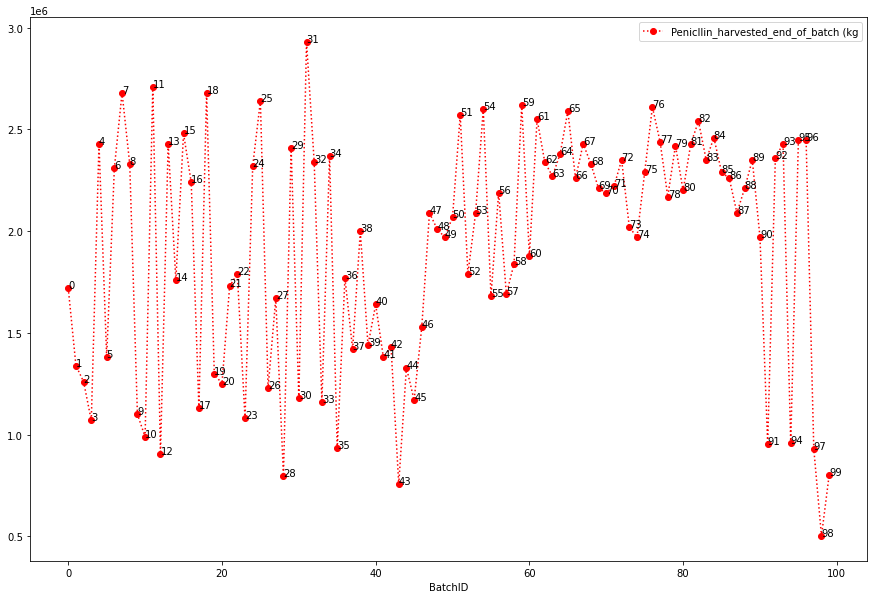

In [30]:
# Visualize data the first Quality data (Penicllin_harvested_end_of_batch (kg)')
plt.figure(figsize=(15, 10))
plt.plot(QD['Penicllin_harvested_end_of_batch (kg)'],'or:',label='Penicllin_harvested_end_of_batch (kg')
# Loop for annotation of all points
for i in range(len(df_indeces)):
    plt.annotate(df_indeces[i], (df_indeces[i], QD['Penicllin_harvested_end_of_batch (kg)'][i] + 0.2))
# plt.plot(QD['Penicllin_yield_total (kg)'],'sb-', label='Penicllin_yield_total (kg)')
plt.xlabel('BatchID')
plt.legend()
plt.show()

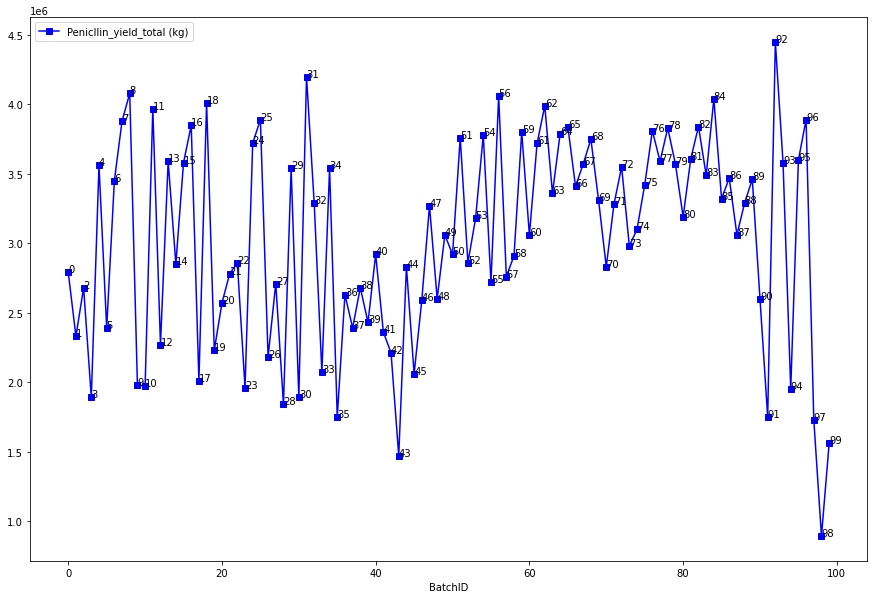

In [31]:
# Visualize data the first Quality data (Penicllin_yield_total (kg)')
plt.figure(figsize=(15, 10))
plt.plot(QD['Penicllin_yield_total (kg)'],'sb-', label='Penicllin_yield_total (kg)')
# Loop for annotation of all points
for i in range(len(df_indeces)):
    plt.annotate(df_indeces[i], (df_indeces[i], QD['Penicllin_yield_total (kg)'][i] + 0.2))
# plt.plot(QD['Penicllin_yield_total (kg)'],'sb-', label='Penicllin_yield_total (kg)')
plt.xlabel('BatchID')
plt.legend(loc='upper left')
plt.show()

#### The quality attributes (Penicillin_harvested_end_of batch(kg) and Penicillin_yield_total (kg) were plotted as function of batchID as shown in the above figures respectively. From Figure 1, we can see that batchID 32 is the batch with highest Penicillin_harvested_end_of batch(kg). On the other hand, batchID 93 is the batch with highest Penicillin_yield_total (kg) as deduced from Figure 2 which is also shows the batchID 32 is the batch with the 2nd highest Penicillin_yield_total (kg). Therefore, these two batches i.e., 32 and 93 are interesting for further analysis.

In [32]:
#There is a need to scale the process data since it includes variables with different units 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Std_Pr_data = pd.DataFrame(scaler.fit_transform(Cleaned_data), columns = Cleaned_data.columns)
Std_Pr_data.head()

Aeration rate(Fg:L/h) at time 10  Aeration rate(Fg:L/h) at time 20  \
0                               0.0                          0.175863   
1                               0.0                          0.175863   
2                               0.0                          0.175863   
3                               0.0                          0.175863   
4                               0.0                          0.175863   

   Aeration rate(Fg:L/h) at time 30  Aeration rate(Fg:L/h) at time 40  \
0                               0.0                               0.0   
1                               0.0                               0.0   
2                               0.0                               0.0   
3                               0.0                               0.0   
4                               0.0                               0.0   

   Aeration rate(Fg:L/h) at time 50  Aeration rate(Fg:L/h) at time 70  \
0                               0.0                               0.0   
1                               0.0                               0.0   
2                               0.0                               0.0   
3                               0.0                               0.0   
4                               0.0                               0.0   

   Aeration rate(Fg:L/h) at time 80  Aeration rate(Fg:L/h) at time 90  \
0                               0.0                               0.0   
1                               0.0                               0.0   
2                               0.0                               0.0   
3                               0.0                               0.0   
4                               0.0                               0.0   

   Aeration rate(Fg:L/h) at time 120  Aeration rate(Fg:L/h) at time 150  ...  \
0                                0.0                                0.0  ...   
1                                0.0                                0.0  ...   
2                                0.0                                0.0  ...   
3                                0.0                                0.0  ...   
4                                0.0                                0.0  ...   

   Ammonia shots(NH3_shots:kgs) at time 20  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   Ammonia shots(NH3_shots:kgs) at time 30  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   Ammonia shots(NH3_shots:kgs) at time 40  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   Ammonia shots(NH3_shots:kgs) at time 50  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   Ammonia shots(NH3_shots:kgs) at time 70  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   Ammonia shots(NH3_shots:kgs) at time 80  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   Ammonia shots(NH3_shots:kgs) at time 90  \
0                                      0.0   
1           

In [33]:
#while the QD block was preprocessed with mean-centering only as the two attributes are in kg
#center the values in each column of the DataFrame
QD_centered = QD.apply(lambda x: x-x.mean())

#view centered DataFrame
print(QD_centered)
# https://www.statology.org/center-data-in-python/

    Penicllin_harvested_during_batch(kg)  \
0                               -38560.0   
1                              -122560.0   
2                               311440.0   
3                              -292560.0   
4                                21440.0   
..                                   ...   
95                               31440.0   
96                              331440.0   
97                             -308560.0   
98                             -719560.0   
99                             -355560.0   

    Penicllin_harvested_end_of_batch (kg)  Penicllin_yield_total (kg)  
0                               -200660.0                   -239310.0  
1                               -580660.0                   -699310.0  
2                               -660660.0                   -349310.0  
3                               -850660.0                  -1139310.0  
4                                509340.0                    530690.0  
..                                    .

In [34]:
# We need the process data and the Quality data in one array
# compine both of arrays in one array
# Merge process data and quality data into one array 
Process_QD_array = pd.concat([Std_Pr_data, QD_centered], axis=1)
display(Process_QD_array)
#https://www.geeksforgeeks.org/how-to-combine-two-dataframe-in-python-pandas/

Aeration rate(Fg:L/h) at time 10  Aeration rate(Fg:L/h) at time 20  \
0                                0.0                          0.175863   
1                                0.0                          0.175863   
2                                0.0                          0.175863   
3                                0.0                          0.175863   
4                                0.0                          0.175863   
..                               ...                               ...   
95                               0.0                          0.175863   
96                               0.0                          0.175863   
97                               0.0                          0.175863   
98                               0.0                         -5.686241   
99                               0.0                         -5.686241   

    Aeration rate(Fg:L/h) at time 30  Aeration rate(Fg:L/h) at time 40  \
0                                0.0                               0.0   
1                                0.0                               0.0   
2                                0.0                               0.0   
3                                0.0                               0.0   
4                                0.0                               0.0   
..                               ...                               ...   
95                               0.0                               0.0   
96                               0.0                               0.0   
97                               0.0                               0.0   
98                               0.0                               0.0   
99                               0.0                               0.0   

    Aeration rate(Fg:L/h) at time 50  Aeration rate(Fg:L/h) at time 70  \
0                                0.0                               0.0   
1                                0.0                               0.0   
2                                0.0                               0.0   
3                                0.0                               0.0   
4                                0.0                               0.0   
..                               ...                               ...   
95                               0.0                               0.0   
96                               0.0                               0.0   
97                               0.0                               0.0   
98                               0.0                               0.0   
99                               0.0                               0.0   

    Aeration rate(Fg:L/h) at time 80  Aeration rate(Fg:L/h) at time 90  \
0                                0.0                               0.0   
1                                0.0                               0.0   
2                                0.0                               0.0   
3                                0.0                               0.0   
4                                0.0                               0.0   
..                               ...                               ...   
95                               0.0                               0.0   
96                               0.0                               0.0   
97                               0.0                               0.0   
98                               0.0                               0.0   
99                               0.0                               0.0   

    Aeration rate(Fg:L/h) at time 120  Aeration rate(Fg:L/h) at time 150  ...  \
0                                 0.0                                0.0  ...   
1                                 0.0                                0.0  ...   
2                                 0.0                                0.0  ...   
3                                 0.0                                0.0  ...   
4                                 0.0      

In [35]:
################################################################################################################
# The next step is to select the feature that could give information, and remove all the data with low variance#
#How to Choose a Feature Selection Method For Machine Learning                                                 #
# Feature selection is the process of reducing the number of input variables when developing a predictive model#
# It is desirable to reduce the number of input variables to both reduce the computational cost of modeling and#
#in some cases, to improve the performance of the model.                                                       #
################################################################################################################
# Feature selection evaluate the relationship between each input variable and the target variable              #
################################################################################################################
from sklearn.feature_selection import VarianceThreshold

Features_selected = VarianceThreshold(threshold=(.8 * (1 - .8)))
# Data_set_selected= Features_selected.fit_transform(Process_QD_array)
#show high variance features
# Data_set_selected

# https://www.datasciencesmachinelearning.com/2019/10/feature-selection-using-sklearn.html
# https://towardsdatascience.com/how-to-use-variance-thresholding-for-robust-feature-selection-a4503f2b5c3f

In [36]:

_ = Features_selected.fit(Process_QD_array)

mask = Features_selected.get_support()


In [37]:
sel_Process_QD_array = Process_QD_array.loc[:, mask]

In [38]:
sel_Process_QD_array.head()

Aeration rate(Fg:L/h) at time 20  Sugar feed rate(Fs:L/h) at time 20  \
0                          0.175863                            0.175863   
1                          0.175863                            0.175863   
2                          0.175863                            0.175863   
3                          0.175863                            0.175863   
4                          0.175863                            0.175863   

   Sugar feed rate(Fs:L/h) at time 30  Sugar feed rate(Fs:L/h) at time 80  \
0                            0.175863                            0.175863   
1                            0.175863                            0.175863   
2                            0.175863                            0.175863   
3                            0.175863                            0.175863   
4                            0.175863                            0.175863   

   Sugar feed rate(Fs:L/h) at time 90  Sugar feed rate(Fs:L/h) at time 120  \
0                            0.175863                             0.025828   
1                            0.175863                             0.025828   
2                            0.175863                             0.025828   
3                            0.175863                             0.025828   
4                            0.175863                             0.025828   

   Sugar feed rate(Fs:L/h) at time 150  Acid flow rate(Fa:L/h) at time 10  \
0                             0.082479                          -0.100504   
1                             0.082479                          -0.100504   
2                             0.082479                          -0.100504   
3                             0.082479                          -0.100504   
4                             0.082479                          -0.100504   

   Acid flow rate(Fa:L/h) at time 90  Acid flow rate(Fa:L/h) at time 120  ...  \
0                          -0.234866                           -0.100504  ...   
1                          -0.234866                           -0.100504  ...   
2                          -0.234866                           -0.100504  ...   
3                          -0.234866                           -0.100504  ...   
4                          -0.234866                           -0.100504  ...   

   Carbon evolution rate(CER:g/h) at time 50  \
0                                  -1.242605   
1                                  -0.222368   
2                                   0.658625   
3                                  -0.325585   
4                                   0.175693   

   Carbon evolution rate(CER:g/h) at time 70  \
0                                  -1.560705   
1                                  -0.411958   
2                                   0.780020   
3                                  -1.015668   
4                                   0.676571   

   Carbon evolution rate(CER:g/h) at time 80  \
0                                  -1.442471   
1                                  -0.387886   
2                                   0.823631   
3                                  -0.970419   
4                                   0.635312   

   Carbon evolution rate(CER:g/h) at time 90  \
0                                  -1.318461   
1                                  -0.107406   
2                                   0.910015   
3                                  -1.010660   
4                                   0.646985   

   Carbon evolution rate(CER:g/h) at time 120  \
0                                   -0.499987   
1                                   -0.107092   
2                                    0.557242   
3                                   -0.955647   
4                                    0.401551   

   Carbon evolution rate(CER:g/h) at time 150  \
0                                    0.505883   
1                                   -0.148192   
2                                    0.322559   
3                      

In [39]:
# this correlation matrix is used to demonstrate the impact of each variable with the QD 

corr = sel_Process_QD_array.corr()
corr.style.background_gradient(cmap='coolwarm')

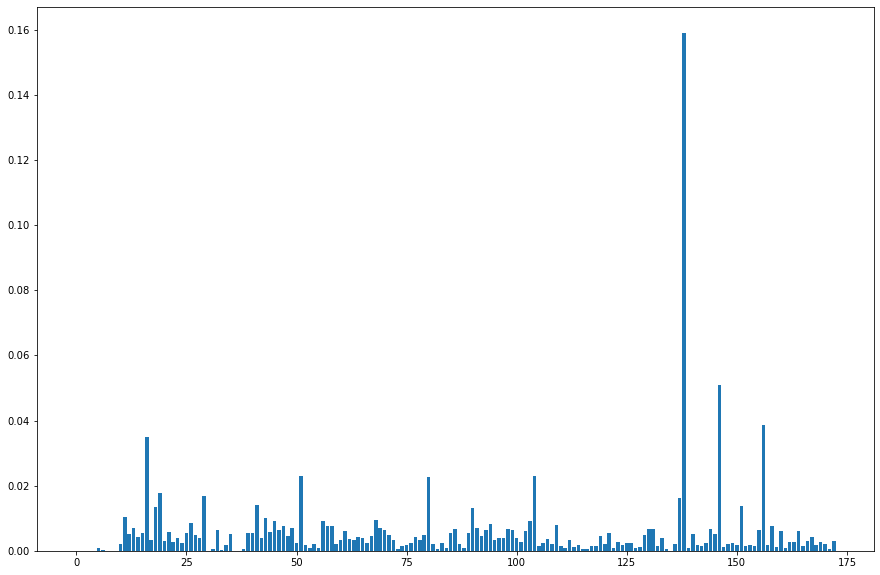

In [40]:
# random forest for feature importance on a regression problem for Penicllin_harvested_end_of_batch (kg) 
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
# define dataset
X,y = sel_Process_QD_array.iloc[:,:173],sel_Process_QD_array.iloc[:,174]
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
# i=0
# for name, importance in zip(sel_Process_QD_array.iloc[:,:173].keys(), model.feature_importances_):
#     print(i,name, "=", importance)
#     i+=1
# for i,v in enumerate(importance):
# 	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.figure(figsize=(15, 10))
pyplot.bar([x for x in range(len(model.feature_importances_))], model.feature_importances_)
pyplot.show()


In [41]:
# Choose only the data that has importance greater than 0.01, for Penicllin_harvested_end_of_batch
high_effect_variable=list()
for name, importance in zip(sel_Process_QD_array.iloc[:,:173].keys(), model.feature_importances_ > 0.01):
    if importance: 
              
        print(name, "=", importance)
        high_effect_variable.append(name)
        

Base flow rate(Fb:L/h) at time 20 = True
Base flow rate(Fb:L/h) at time 80 = True
Base flow rate(Fb:L/h) at time 120 = True
Base flow rate(Fb:L/h) at time 150 = True
Heating/cooling water flow rate(Fc:L/h) at time 150 = True
Substrate concentration(S:g/L) at time 20 = True
Substrate concentration(S:g/L) at time 40 = True
Dissolved oxygen concentration(DO2:mg/L) at time 20 = True
Vessel Weight(Wt:Kg) at time 10 = True
pH(pH:pH) at time 10 = True
Temperature(T:K) at time 50 = True
PAA flow(Fpaa:PAA flow (L/h)) at time 150 = True
PAA concentration offline(PAA_offline:PAA (g L^{-1})) at time 120 = True
Oxygen Uptake Rate(OUR:(g min^{-1})) at time 80 = True
Oxygen in percent in off-gas(O2:O2  (%)) at time 20 = True
Oxygen in percent in off-gas(O2:O2  (%)) at time 80 = True


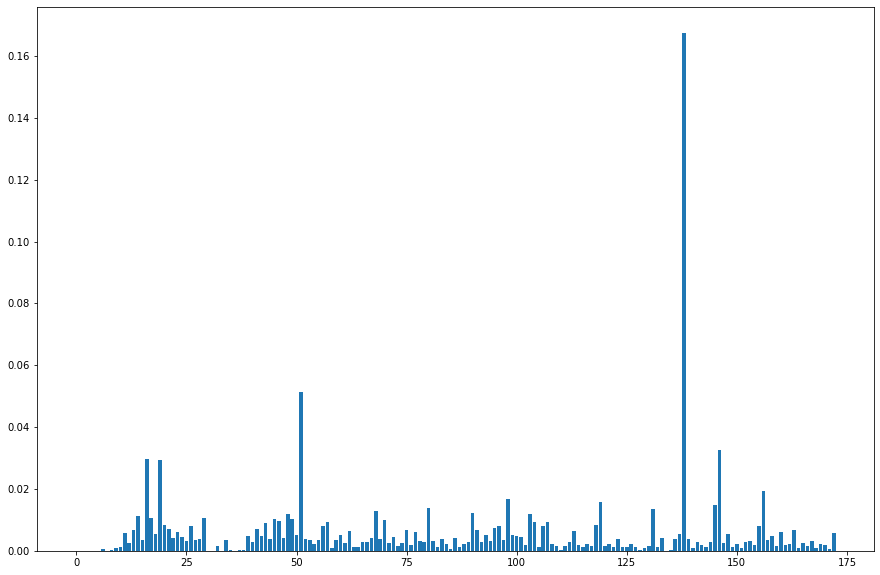

In [42]:
# random forest for feature importance on a regression problem for and Penicllin_yield_total (kg)
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
# define dataset
X,y = sel_Process_QD_array.iloc[:,:173],sel_Process_QD_array.iloc[:,175]
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
# i=0
# for name, importance in zip(sel_Process_QD_array.iloc[:,:173].keys(), model.feature_importances_):
#     print(i,name, "=", importance)
#     i+=1
# for i,v in enumerate(importance):
# 	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.figure(figsize=(15, 10))
pyplot.bar([x for x in range(len(model.feature_importances_))], model.feature_importances_)
pyplot.show()


In [43]:
# Choose only the data that has importance greater than 0.01, for Penicllin_harvested_end_of_batch (kg)	Penicllin_yield_total (kg)
high_effect_variable_t=list()
for name, importance in zip(sel_Process_QD_array.iloc[:,:173].keys(), model.feature_importances_ > 0.01):
    if importance: 
              
        print(name, "=", importance)
        high_effect_variable_t.append(name)
        

Base flow rate(Fb:L/h) at time 50 = True
Base flow rate(Fb:L/h) at time 80 = True
Base flow rate(Fb:L/h) at time 90 = True
Base flow rate(Fb:L/h) at time 150 = True
Heating/cooling water flow rate(Fc:L/h) at time 150 = True
Substrate concentration(S:g/L) at time 70 = True
Substrate concentration(S:g/L) at time 120 = True
Substrate concentration(S:g/L) at time 150 = True
Dissolved oxygen concentration(DO2:mg/L) at time 20 = True
Penicillin concentration(P:g/L) at time 120 = True
Vessel Weight(Wt:Kg) at time 10 = True
pH(pH:pH) at time 10 = True
pH(pH:pH) at time 120 = True
Temperature(T:K) at time 40 = True
Generated heat(Q:kJ) at time 150 = True
PAA flow(Fpaa:PAA flow (L/h)) at time 40 = True
PAA concentration offline(PAA_offline:PAA (g L^{-1})) at time 120 = True
Oxygen Uptake Rate(OUR:(g min^{-1})) at time 70 = True
Oxygen Uptake Rate(OUR:(g min^{-1})) at time 80 = True
Oxygen in percent in off-gas(O2:O2  (%)) at time 80 = True


In [45]:
# #Plotting feature importance The same as the graph in cell 41 

# feat_importances = pd.DataFrame(model.feature_importances_, index=sel_Process_QD_array.iloc[:,:173].keys(), columns=["Importance"])
# feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
# feat_importances.plot(kind='bar', figsize=(30,30))

#### Unfold data into batches, cleaning data, select the variables that could have high impact on Penicllin_harvested_end_of_batch, and finally, prepare data for prediction using different models 


Feature: 0, Score: -79508.63476 Base flow rate(Fb:L/h) at time 20
Feature: 1, Score: 54453.67346 Base flow rate(Fb:L/h) at time 80
Feature: 2, Score: -62420.80865 Base flow rate(Fb:L/h) at time 120
Feature: 3, Score: 505.89536 Base flow rate(Fb:L/h) at time 150
Feature: 4, Score: 42743.65228 Heating/cooling water flow rate(Fc:L/h) at time 150
Feature: 5, Score: 47094.07652 Substrate concentration(S:g/L) at time 20
Feature: 6, Score: -19730.52440 Substrate concentration(S:g/L) at time 40
Feature: 7, Score: 101081.06309 Dissolved oxygen concentration(DO2:mg/L) at time 20
Feature: 8, Score: 76902.19752 Vessel Weight(Wt:Kg) at time 10
Feature: 9, Score: 13353.58163 pH(pH:pH) at time 10
Feature: 10, Score: 140275.85114 Temperature(T:K) at time 50
Feature: 11, Score: -173525.75325 PAA flow(Fpaa:PAA flow (L/h)) at time 150
Feature: 12, Score: -261930.62522 PAA concentration offline(PAA_offline:PAA (g L^{-1})) at time 120
Feature: 13, Score: -1883315.29189 Oxygen Uptake Rate(OUR:(g min^{-1})) 

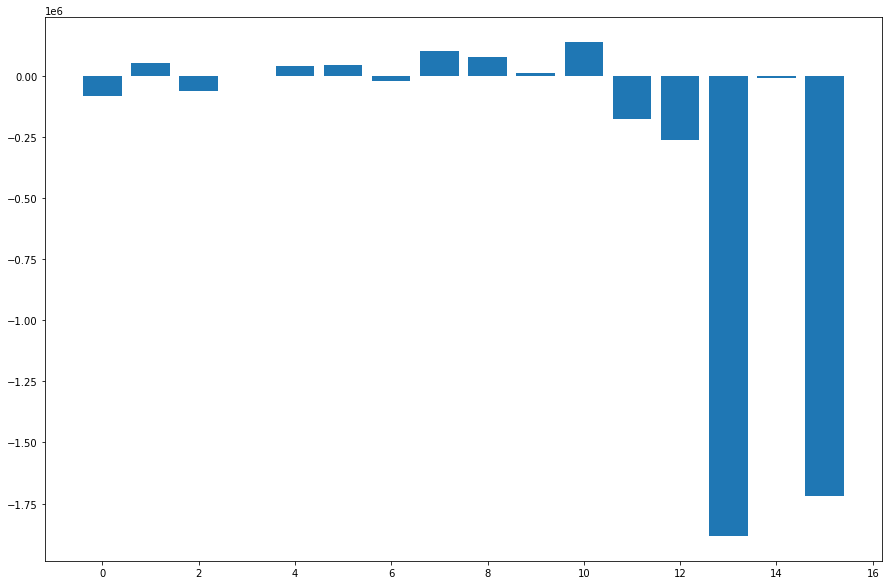

In [46]:
# linear regression feature importance for Penicllin_harvested_end_of_batch (kg)
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# define dataset
X,y = sel_Process_QD_array[high_effect_variable],sel_Process_QD_array.iloc[:,174]
# define the model
model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v),high_effect_variable[i])

# plot feature importance
plt.figure(figsize=(15, 10))
pyplot.bar([x for x in range(len(importance))], importance)
 
# Finallt plotting the graph
pyplot.show()

# https://machinelearningmastery.com/calculate-feature-importance-with-python/
# https://medium.com/analytics-vidhya/feature-importance-explained-bfc8d874bcf

##### Regarding the above Chart, it can be shown that the effect of variables on Penicllin_harvested_end_of_batch, could be either positive or nigative. 

##### The effect of variables are nigative, means increasing it will decrease the Penicllin harvested end of Batch, such as Oxygen in percent in off-gas(O2:O2  (%)) at time 80, Oxygen Uptake Rate(OUR:(g min^{-1})) at time 80,PAA flow(Fpaa:PAA flow (L/h)) at time 40, and Temperature(T:K) at time 50

##### On the other hand, the ones that have posistive correlation -increasing it will increase the Penicllin harvested end of Batch-, the highest impactfull variables among them all are  such as Oxygen in percent in off-gas(O2:O2  (%)) at time 70,Oxygen Uptake Rate(OUR:(g min^{-1})) at time 70, and PAA concentration offline(PAA_offline:PAA (g L^{-1})) at time 120

Feature: 0, Score: -134096.66788 Base flow rate(Fb:L/h) at time 50
Feature: 1, Score: 124590.04931 Base flow rate(Fb:L/h) at time 80
Feature: 2, Score: 20080.30665 Base flow rate(Fb:L/h) at time 90
Feature: 3, Score: 56973.99266 Base flow rate(Fb:L/h) at time 150
Feature: 4, Score: 29856.98985 Heating/cooling water flow rate(Fc:L/h) at time 150
Feature: 5, Score: -46250.43290 Substrate concentration(S:g/L) at time 70
Feature: 6, Score: -416453.91144 Substrate concentration(S:g/L) at time 120
Feature: 7, Score: 361039.45705 Substrate concentration(S:g/L) at time 150
Feature: 8, Score: 87615.23406 Dissolved oxygen concentration(DO2:mg/L) at time 20
Feature: 9, Score: -177571.16978 Penicillin concentration(P:g/L) at time 120
Feature: 10, Score: 15575.79002 Vessel Weight(Wt:Kg) at time 10
Feature: 11, Score: 40470.81197 pH(pH:pH) at time 10
Feature: 12, Score: 96758.27803 pH(pH:pH) at time 120
Feature: 13, Score: -24707.58319 Temperature(T:K) at time 40
Feature: 14, Score: -73226.03848 Gen

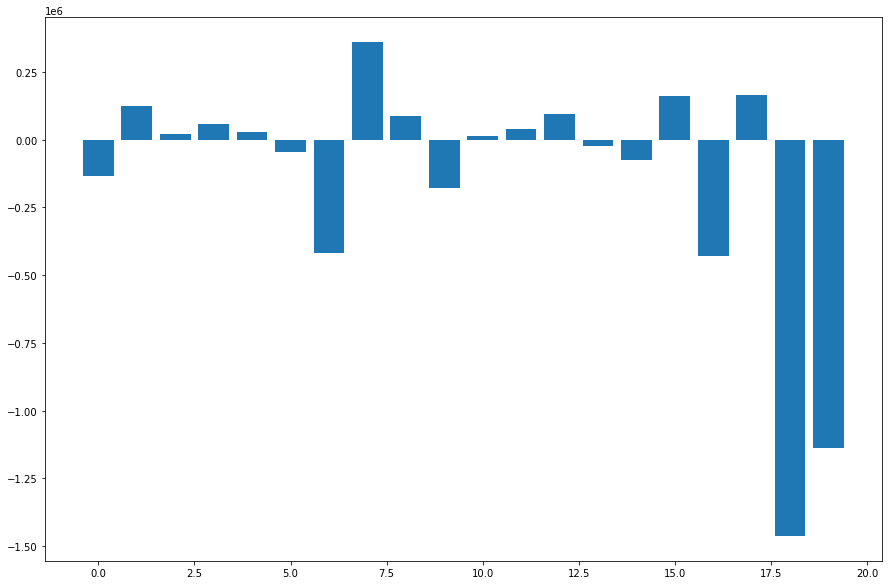

In [47]:
# linear regression feature importance Penicllin_yield_total (kg)
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# define dataset
X,y = sel_Process_QD_array[high_effect_variable_t],sel_Process_QD_array.iloc[:,175]
# define the model
model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
     print('Feature: %0d, Score: %.5f' % (i,v),high_effect_variable_t[i])
# plot feature importance
plt.figure(figsize=(15, 10))
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# https://machinelearningmastery.com/calculate-feature-importance-with-python/

##### Regarding the above Chart, it can be shown that the effect of variables on Penicllin_yield_total (kg)could be either positive or nigative. 

##### The effect of variables are nigative, means increasing it will decrease the Penicllin_yield_total (kg), such as Oxygen in percent in off-gas(O2:O2  (%)) at time 70, Oxygen Uptake Rate(OUR:(g min^{-1})) at time 70,PAA concentration offline(PAA_offline:PAA (g L^{-1})) at time 120


##### On the other hand, the ones that have posistive correlation -increasing it will increase the Penicllin_yield_total (kg)-, the highest impactfull variables among them all are  such as Oxygen in percent in off-gas(O2:O2  (%)) at time 80,PAA flow(Fpaa:PAA flow (L/h)) at time 40,Temperature(T:K) at time 80, Temperature(T:K) at time 50, and pH(pH:pH) at time 120



#### The upcoming cells, introduce the appility to predict the Quality data  using the selected features. 

###### The below cells is intended to predict Penicllin_harvested_end_of_batch 

In [48]:
#Splitting training and testing data and make prediction of Penicllin_harvested_end_of_batch 

# Since the data are not gaussian distributed with 0 mean and 1 sd, we need to transofrm the data to a gaussian like distribution
X,y=sel_Process_QD_array[high_effect_variable],sel_Process_QD_array.iloc[:,174]

# split data into test and train data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)



# https://scikit-learn.org/stable/modules/preprocessing.html#

In [49]:
# Neutral Network regression 

PLS_R = PLSRegression(n_components=10, max_iter= 1000, tol=10).fit(X_train, y_train)


ytr_pred=PLS_R.predict(X_train)
mse = mean_squared_error(ytr_pred, y_train,squared=False)
r2 = r2_score(ytr_pred, y_train)
# MSEmean_squared_error(ytr_pred, y_train['Penicllin_harvested_during_batch(kg)'],squared=False)
print("MSE: %.2f" % mse)
print("r2: %.2f"%r2)


MSE: 407834.62
r2: 0.05


In [50]:
# ytr_pred=PLS_R.predict(X_test)
# mse = mean_squared_error(ytr_pred, y_test.iloc[:,0],squared=False)
# r2 = r2_score(ytr_pred, y_test.iloc[:,0])
# # MSEmean_squared_error(ytr_pred, y_train['Penicllin_harvested_during_batch(kg)'],squared=False)
# print("MSE: %.2f" % mse)
# print("r2: %.2f"%r2)


In [51]:
#define predictor and response variables

#define cross-validation method to use
cv = KFold(n_splits=10, random_state=1, shuffle=True)

#build multiple linear regression model
# model = LinearRegression()

#use k-fold CV to evaluate model
scores = cross_val_score(PLS_R, X,y,
                         cv=cv, n_jobs=-1)

#view mean absolute error
abs(scores)




array([0.82562676, 0.12730905, 1.17346679, 0.34744691, 0.7180905 ,
       0.39125118, 1.4166319 , 0.80197045, 0.81294786, 0.29938546])

In [52]:
# Neutral Network regression 

PLS_R = PLSRegression(n_components=22, max_iter= 1000, tol=1e-01).fit(X_train, y_train)


ytr_pred=PLS_R.predict(X_train)
mse = mean_squared_error(ytr_pred, y_train,squared=False)
r2 = r2_score(ytr_pred,y_train)
# MSEmean_squared_error(ytr_pred, y_train['Penicllin_harvested_during_batch(kg)'],squared=False)
print("MSE: %.2f" % mse)
print("r2: %.2f"%r2)


MSE: 401602.18
r2: 0.11


In [53]:
### Random forest 
# Import library
from sklearn import linear_model
# Building lasso regression model with hyperparameter alpha = 0.1
clf = linear_model.Lasso(alpha=0.1)

clf.fit(X_train, y_train)

clf.coef_

clf.intercept_

ytr_pred=clf.predict(X_train)
mse = mean_squared_error(ytr_pred, y_train,squared=False)
r2 = r2_score(ytr_pred, y_train)

print("MSE: %.2f" % mse)
print("r2: %.2f"%r2)




MSE: 402081.14
r2: 0.09


###### The below cells is intended to predict Penicllin_harvested_end_of_batch 

In [54]:
#Splitting training and testing data and make prediction of Penicllin_yield_total (kg)

# Since the data are not gaussian distributed with 0 mean and 1 sd, we need to transofrm the data to a gaussian like distribution
X,y=sel_Process_QD_array[high_effect_variable_t],sel_Process_QD_array.iloc[:,175]

# split data into test and train data 
X_train_TY, X_test_TY, y_train_TY, y_test_TY = train_test_split(X, y, test_size = 0.25, random_state = 0)



# https://scikit-learn.org/stable/modules/preprocessing.html#

In [55]:
# Neutral Network regression for predicting Penicllin_yield_total (kg)

PLS_R = PLSRegression(n_components=22, max_iter= 1000, tol=1e-03).fit(X_train_TY, y_train_TY)


ytr_pred_TY=PLS_R.predict(X_train_TY)
mse = mean_squared_error(ytr_pred_TY, y_train_TY,squared=False)
r2 = r2_score(ytr_pred_TY,y_train_TY)
# MSEmean_squared_error(ytr_pred, y_train['Penicllin_harvested_during_batch(kg)'],squared=False)
print("MSE: %.2f" % mse)
print("r2: %.2f"%r2)


MSE: 471667.02
r2: 0.26


In [56]:
# Disicion tree regression for predicting Penicllin_yield_total (kg)
Tree_R = tree.DecisionTreeRegressor(max_depth=6).fit(X_train_TY, y_train_TY)


ytr_pred_TY=Tree_R.predict(X_train_TY)
mse = mean_squared_error(ytr_pred_TY, y_train_TY,squared=False)
r2 = r2_score(ytr_pred_TY, y_train_TY)

print("MSE: %.2f" % mse)
print("r2: %.2f"%r2)

MSE: 136407.82
r2: 0.96


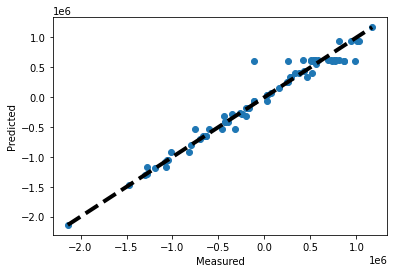

In [57]:
fig,ax = plt.subplots()
ax.scatter(y_train_TY, ytr_pred_TY)
ax.plot([ytr_pred_TY.min(), ytr_pred_TY.max()], [ytr_pred_TY.min(), ytr_pred_TY.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
fig.show()

In [58]:
ytr_pred_TY=Tree_R.predict(X_test_TY)
mse = mean_squared_error(ytr_pred_TY, y_test_TY,squared=False)
r2 = r2_score(ytr_pred_TY, y_test_TY)
# MSEmean_squared_error(ytr_pred, y_train['Penicllin_harvested_during_batch(kg)'],squared=False)
print("MSE: %.2f" % mse)
print("r2: %.2f"%r2)


MSE: 797811.69
r2: -0.43


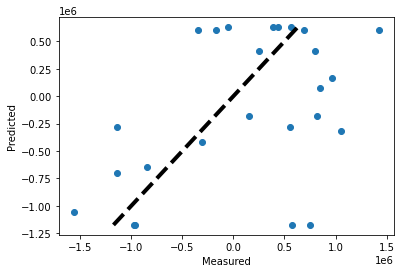

In [59]:
# Finally, we'll visualize the results in a plot.

fig,ax = plt.subplots()
ax.scatter(y_test_TY, ytr_pred_TY)
ax.plot([ytr_pred_TY.min(), ytr_pred_TY.max()], [ytr_pred_TY.min(), ytr_pred_TY.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
fig.show()

# plt.figure(figsize=(10,10))
# plt.scatter(true_value, predicted_value, c='crimson')
# plt.yscale('log')
# plt.xscale('log')

### https://www.tutorialspoint.com/how-to-annotate-several-points-with-one-text-in-matplotlib

https://www.analyticsvidhya.com/blog/2021/05/yellowbrick-visualization-for-model-predictions/

http://scikit-learn.sourceforge.net/dev/auto_examples/plot_cv_predict.html

## Demonstarte which batch behaves as the other.
###### To explain this, we need to make a classification model and visualize it to se the clusters will be formed 

In [60]:
color=['b','g','r','c','m','y','k','w','gray','lime']

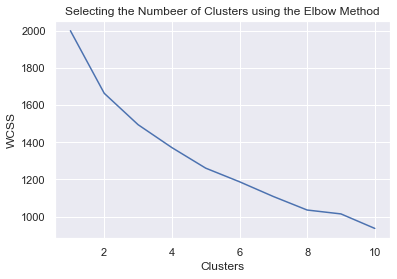

In [62]:
from sklearn.cluster import KMeans

# Determine number of clusters for this case, we use the elbow method. 
# From the graph we can that 8 clusters is the number for K
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    
wcss=[] 
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
seaborn.set()
plt.plot(range(1, 11), wcss)

plt.title('Selecting the Numbeer of Clusters using the Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

# From this plot, we can see that nine is the optimum number of clusters, 
# as this is where the “elbow” of the curve appears.   

In [63]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=8)
kmeans.fit(X)
pred_kmeans = kmeans.predict(X)

print(pred_kmeans)

[2 1 1 2 1 1 1 1 3 1 1 1 1 1 1 1 1 0 2 2 0 2 2 0 3 1 1 2 2 3 1 1 2 2 2 2 2
 1 0 1 2 1 1 1 3 2 1 1 2 0 3 2 1 1 2 2 2 1 2 1 7 2 2 1 1 1 7 1 7 1 0 2 7 2
 6 1 1 2 1 2 1 2 2 1 2 1 2 1 1 2 4 1 2 5 4 2 3 1 5 5]


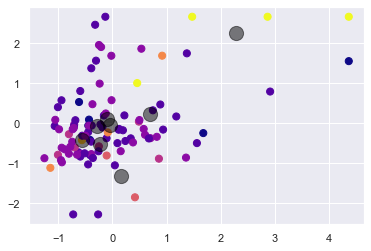

In [65]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=pred_kmeans, s=50, cmap='plasma')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

# https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

### Summary

Before going through data processing, the need for exploring data is a must, by ploting the data in its raw form. 
The quality attributes (Penicillin_harvested_end_of batch(kg) and Penicillin_yield_total (kg) were plotted as function of batchID as shown in Figure 1 and Figure 2 respectively. From Figure 1, we can see that batchID 32 is the batch with highest Penicillin_harvested_end_of batch(kg). On the other hand, batchID 93 is the batch with highest Penicillin_yield_total (kg) as deduced from Figure 2 which is also shows the batchID 32 is the batch with the 2nd highest Penicillin_yield_total (kg). Therefore, these two batches i.e., 32 and 93 are interesting for further analysis.

In order to go further met processing data, data were preprocessed, first unfolding data to an array that contanis batch numbers as rows, and other features per time as columns. 
Then, data were cleaned from all zero variance columns, and NAN columns. Finally, data were preprocessed using standardscaler due to having different data scales, on the other hand quality data was only preprocessed using mean centring, since quality data has the same unit. 

Furthermore, the need to reduce data in order to make the model as simple as it can, we need to use feature selection using Feature importance. Feature importance method gives us better interpretability of data.It also helps us to find most important feature for prediction.

After determining the most impactful data it appears that 

1) The most Feature impacttful on Penicillin_harvested_end_of batch(kg) demonstarted as follows:

|Feature name                                                       |   
|-------------------------------------------------------------------|
|Oxygen in percent in off-gas(O2:O2  (%)) at time 80                |
|Oxygen in percent in off-gas(O2:O2 (%) at time 20                  |   
|Oxygen Uptake Rate(OUR:(g min^{-1})) at time 80                    |    
|PAA concentration offline(PAA_offline:PAA (g L^{-1})) at time 120  |   
|PAA flow(Fpaa:PAA flow (L/h)) at time 150                          |  
|Temperature(T:K) at time 50                                        |   
|pH(pH:pH) at time 10                                               |   
|Vessel Weight(Wt:Kg) at time 10                                    |   
|Dissolved oxygen concentration(DO2:mg/L) at time 20                |  
|Substrate concentration(S:g/L) at time 40                          |
|Substrate concentration(S:g/L) at time 20                          |   
|Heating/cooling water flow rate(Fc:L/h) at time 150                |   
|Base flow rate(Fb:L/h) at time 150                                 |  
|Base flow rate(Fb:L/h) at time 120                                 |   
|Base flow rate(Fb:L/h) at time 80                                  |   
|Base flow rate(Fb:L/h) at time 20                                  | 

1) The most Feature impacttful on Penicillin_yield_total (kg) demonstarted as follows:

|Feature name                                                       |   
|-------------------------------------------------------------------|
|Oxygen in percent in off-gas(O2:O2  (%)) at time 80                |
|Oxygen Uptake Rate(OUR:(g min^{-1})) at time 80                    |   
|Oxygen Uptake Rate(OUR:(g min^{-1})) at time 70                    |    
|PAA concentration offline(PAA_offline:PAA (g L^{-1})) at time 120  |   
|PAA flow(Fpaa:PAA flow (L/h)) at time 40                           |  
|Generated heat(Q:kJ) at time 150                                   |   
|Temperature(T:K) at time 40                                        |   
|pH(pH:pH) at time 120                                              |   
|pH(pH:pH) at time 10                                               |  
|Vessel Weight(Wt:Kg) at time 10                                    |
|Penicillin concentration(P:g/L) at time 120                        |   
|Dissolved oxygen concentration(DO2:mg/L) at time 20                |   
|Substrate concentration(S:g/L) at time 150                         |  
|Substrate concentration(S:g/L) at time 120                         |   
|Substrate concentration(S:g/L) at time 70                          |   
|Heating/cooling water flow rate(Fc:L/h) at time 150                | 
|Base flow rate(Fb:L/h) at time 150                                 | 
|Base flow rate(Fb:L/h) at time 90                                  | 
|Base flow rate(Fb:L/h) at time 80                                  | 
|Base flow rate(Fb:L/h) at time 50                                  | 

After determining the feature that have impact on the quality data, we remove all the features that have low importance. 

Now the data is redy to see the the power of prediction using the selected features to predict the quality data. 

Confusion matrix were used to show correlation between input variable and the quality variable, 
Some correlation coefficient in the correlation matrix are too small, simply, very low degree of correlation.Despite the correlation between the vaiable is low, we run  a regression analysis.

PLS regression, decision tree, and neural network were demonstrated above. From the R2 metrics it appears that the process data could not be used to predict the quality data. Due to the lack of information that could be gained from it. Unfortanetly, we could not understand the bahavior of the quality data using process data.


[1] https://towardsdatascience.com/how-to-explore-and-visualize-a-dataset-with-python-7da5024900ef

[2] https://stackoverflow.com/questions/44101458/random-forest-feature-importance-chart-using-python

[3] https://vitalflux.com/feature-importance-random-forest-classifier-python/

[4] https://blockgeni.com/calculating-feature-importance-with-python/

[5] https://towardsdatascience.com/how-to-use-variance-thresholding-for-robust-feature-selection-a4503f2b5c3f

[6] 